## Linear Regression High School GPA

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/sat.csv')
print(df.shape)
df.head()

(105, 2)


,high_GPA,univ_GPA
0,3.45,3.52
1,2.78,2.91
2,2.52,2.40
3,3.67,3.47
4,3.24,3.47


(0, 4.1)

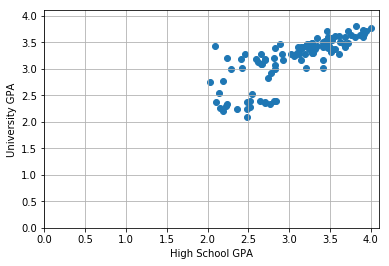

In [3]:
plt.scatter(df['high_GPA'], df['univ_GPA'])
plt.grid()
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.xlim((0, 4.1))
plt.ylim((0, 4.1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['high_GPA'], df['univ_GPA'], \
                                                    test_size=0.25, random_state=35)

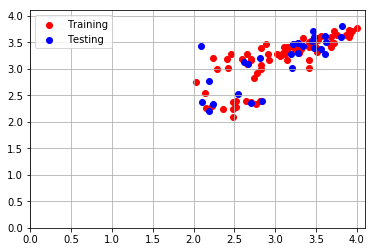

In [13]:
plt.scatter(X_train, y_train, color='r', label='Training')
plt.scatter(X_test, y_test, color='b', label='Testing')
plt.grid()
plt.xlim((0, 4.1))
plt.ylim((0, 4.1))
plt.legend()

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(X_train.values.reshape(-1, 1), y_train)

In [7]:
obtained_y_test = lm.predict([[2],[4]])
obtained_y_test

array([2.44793755, 3.79760353])

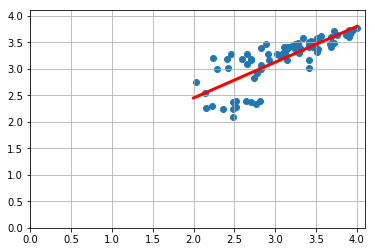

In [8]:
plt.scatter(X_train, y_train, marker='o')
plt.plot([2, 4], obtained_y_test, color='r', linewidth=3)
plt.xlim((0, 4.1))
plt.ylim((0, 4.1))
plt.grid()
plt.show()

In [9]:
obtained_y_test = lm.predict(X_test.values.reshape(-1, 1))

In [10]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, obtained_y_test)
print("MSE = %f" % mse)

MSE = 0.088300


In [11]:
lm.score(X_test.values.reshape(-1, 1), y_test)

0.6073451354758679

## 3-fold Cross validation - Score of every Training Data Set 

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

scores = cross_val_score(LinearRegression(), df['high_GPA'].values.reshape(-1,1), df['univ_GPA'].values.reshape(-1,1), cv=5)
print("Cross-validated scores:", scores)
print("Accuracy: %0.2f" % (scores.mean()))

Cross-validated scores: [0.72486913 0.6799228  0.25777574 0.62899419 0.46186565]
Accuracy: 0.55
